In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [60]:
# Reading the full data
# removing the header row, the sample names
# Dropping the first 2 columns (gene ID_REF and identifiers)
Data = pd.read_csv("leukemia_full.csv", header=None, skiprows=[0], usecols=[i for i in range(2,66)])
Data.head()

,2,3,4,5,6,7,8,9,10,11,...,56,57,58,59,60,61,62,63,64,65
0,3.01670,3.28567,2.92948,2.92282,3.15950,3.16333,2.98590,3.12271,3.07095,3.07800,...,3.13427,3.20705,2.97139,2.84377,3.03760,3.04886,3.11388,3.03301,3.21275,3.44830
1,7.97774,6.53251,6.38801,6.46668,6.43280,6.40732,6.42647,6.37639,6.46907,6.62134,...,6.55024,6.91601,7.15575,6.47164,6.50803,6.63174,6.52861,6.68481,6.55603,6.34190
2,4.20728,4.99497,4.40160,4.74711,4.83005,4.21376,4.88442,4.43189,4.84967,4.43297,...,4.51884,4.19324,4.06188,4.17565,4.11509,5.09069,4.45671,3.92363,4.25868,4.32786
3,7.25609,7.42081,6.99934,7.09449,7.02433,7.17929,7.15990,7.00998,6.83098,7.20862,...,7.55083,7.28955,6.93698,7.13647,7.13442,7.28159,7.10976,7.11019,7.09445,7.09615
4,2.20496,2.33163,2.13331,2.18333,2.12778,2.26970,2.26471,2.25394,2.28792,2.23319,...,2.28651,2.24272,2.19901,2.09922,2.21429,2.19899,2.16208,2.22359,2.25645,2.24060


In [61]:
# Transposing the full data
Data = Data.T
#Data.reset_index(drop=True)
Data.head()

,0,1,2,3,4,5,6,7,8,9,...,22273,22274,22275,22276,22277,22278,22279,22280,22281,22282
2,3.01670,7.97774,4.20728,7.25609,2.20496,7.28437,4.26579,2.69435,3.64630,3.04029,...,6.28502,5.66261,14.2288,13.7137,2.30830,3.31593,2.93130,2.92133,2.31095,2.97928
3,3.28567,6.53251,4.99497,7.42081,2.33163,6.98359,4.97068,2.91632,8.81789,3.38487,...,6.08222,6.18648,15.0424,14.4868,2.38897,3.40424,3.05727,3.21657,2.40820,3.11119
4,2.92948,6.38801,4.40160,6.99934,2.13331,6.86337,4.59555,2.57813,11.42490,2.95885,...,6.12891,5.82164,13.9840,13.2874,2.27367,3.19368,2.81962,2.77051,2.26641,2.85658
5,2.92282,6.46668,4.74711,7.09449,2.18333,6.86597,4.57555,2.65972,10.74740,3.04788,...,6.17341,6.14553,14.1282,13.7601,2.28065,3.26930,2.86089,2.87007,2.29356,2.95689
6,3.15950,6.43280,4.83005,7.02433,2.12778,7.21984,4.54796,2.56744,9.29604,2.87856,...,6.84674,6.35986,14.1824,13.6000,2.23884,3.23273,2.84119,2.80179,2.25907,2.90264


In [56]:
# checking the actual dimension of the whole data
Data.shape

(64, 22283)

In [132]:
# Adding a separate column for patients
# will be used during merging with label
patients = [str(i) for i in range(0,len(Data))]
Data["Samples"] = patients
Data.head()

,0,1,2,3,4,5,6,7,8,9,...,22274,22275,22276,22277,22278,22279,22280,22281,22282,Samples
2,3.01670,7.97774,4.20728,7.25609,2.20496,7.28437,4.26579,2.69435,3.64630,3.04029,...,5.66261,14.2288,13.7137,2.30830,3.31593,2.93130,2.92133,2.31095,2.97928,0
3,3.28567,6.53251,4.99497,7.42081,2.33163,6.98359,4.97068,2.91632,8.81789,3.38487,...,6.18648,15.0424,14.4868,2.38897,3.40424,3.05727,3.21657,2.40820,3.11119,1
4,2.92948,6.38801,4.40160,6.99934,2.13331,6.86337,4.59555,2.57813,11.42490,2.95885,...,5.82164,13.9840,13.2874,2.27367,3.19368,2.81962,2.77051,2.26641,2.85658,2
5,2.92282,6.46668,4.74711,7.09449,2.18333,6.86597,4.57555,2.65972,10.74740,3.04788,...,6.14553,14.1282,13.7601,2.28065,3.26930,2.86089,2.87007,2.29356,2.95689,3
6,3.15950,6.43280,4.83005,7.02433,2.12778,7.21984,4.54796,2.56744,9.29604,2.87856,...,6.35986,14.1824,13.6000,2.23884,3.23273,2.84119,2.80179,2.25907,2.90264,4


In [133]:
# Reading the labelled data
# ONLY the description is needed
# also the samples indecies are added
Label = pd.read_csv("leukemia_label.csv", usecols=["Description"])
Label["Samples"] = patients
Label.head()

,Description,Samples
0,Bone Marrow CD34+ selected cells: n/a. Bone M...,0
1,Bone Marrow: n/a. Bone Marrow Mononuclear Cel...,1
2,Bone Marrow: n/a. Bone Marrow Mononuclear Cel...,2
3,Bone Marrow: n/a. Bone Marrow Mononuclear Cel...,3
4,Bone Marrow: n/a. Bone Marrow Mononuclear Cel...,4


In [134]:
Label.shape

(64, 2)

In [135]:
# Putting in the labels checking from the descriptions
# if leukemia, then 1, otherwise 0
control = 0
labels = []
cancer_values = ["Diagnosis: MDS/AML","Diagnosis: AML","Diagnosis: ET/AML","Diagnosis:AML","Diagnosis: Secondary AML"]
for i in range(0,len(Label)):
    description = Label.iloc[i]["Description"]
    #print (description)
    if any(cancer in description for cancer in cancer_values):
        label_value = 1
    else:
        label_value = 0
        control += 1
    labels.append(label_value)
    #print ("value is: {}".format(label_value))
        
Label["Label"] = labels
cancer = len(Label) - control
print ("Control: %d and Cancer: %d" %(control, cancer))

Control: 38 and Cancer: 26


In [136]:
# Checking the new labelled data without description now
Label = Label.drop(columns=["Description"])
Label.iloc[13:20]

,Samples,Label
13,13,0
14,14,0
15,15,0
16,16,0
17,17,0
18,18,1
19,19,1


In [151]:
# Merging the dataframes to get the labeled data together
Merged_Data = pd.merge(Data, Label, on="Samples")
Merged_Data.head()

,0,1,2,3,4,5,6,7,8,9,...,22275,22276,22277,22278,22279,22280,22281,22282,Samples,Label
0,3.01670,7.97774,4.20728,7.25609,2.20496,7.28437,4.26579,2.69435,3.64630,3.04029,...,14.2288,13.7137,2.30830,3.31593,2.93130,2.92133,2.31095,2.97928,0,0
1,3.28567,6.53251,4.99497,7.42081,2.33163,6.98359,4.97068,2.91632,8.81789,3.38487,...,15.0424,14.4868,2.38897,3.40424,3.05727,3.21657,2.40820,3.11119,1,0
2,2.92948,6.38801,4.40160,6.99934,2.13331,6.86337,4.59555,2.57813,11.42490,2.95885,...,13.9840,13.2874,2.27367,3.19368,2.81962,2.77051,2.26641,2.85658,2,0
3,2.92282,6.46668,4.74711,7.09449,2.18333,6.86597,4.57555,2.65972,10.74740,3.04788,...,14.1282,13.7601,2.28065,3.26930,2.86089,2.87007,2.29356,2.95689,3,0
4,3.15950,6.43280,4.83005,7.02433,2.12778,7.21984,4.54796,2.56744,9.29604,2.87856,...,14.1824,13.6000,2.23884,3.23273,2.84119,2.80179,2.25907,2.90264,4,0


In [153]:
# NOW the samples column aren't needed since already merged
Merged_Data = Merged_Data.drop(columns=["Samples"])
Merged_Data.shape

(64, 22284)

In [190]:
# HERE, we take out 2 samples for prediction purpose of our model later on.
# we will train and test our model on 62 samples instead of 64 for this reason.
rand_idx1 = random.randint(0, len(Merged_Data))
random_sample1 = Merged_Data.iloc[rand_idx1]

rand_idx2 = random.randint(0, len(Merged_Data))
random_sample2 = Merged_Data.iloc[rand_idx2]

# Here we are just printing out their indices and their last 4 gene-values and their labels
# so that we can remeber their labels
print (rand_idx1, rand_idx2) 
random_sample1[-5:len(Merged_Data.columns)], random_sample2[-5:len(Merged_Data.columns)]

27 16


(22279    3.12408
 22280    3.19890
 22281    2.46864
 22282    3.11268
 Label    1.00000
 Name: 27, dtype: float64, 22279    3.28872
 22280    3.33805
 22281    2.56120
 22282    3.22936
 Label    0.00000
 Name: 16, dtype: float64)

In [196]:
# We remove these 2 samples from our dataset, creating the final data
Full_Data = Merged_Data.drop(Merged_Data.index[[rand_idx1,rand_idx2]])
Full_Data.head(), Full_Data.shape

(         0        1        2        3        4        5        6        7  \
 0  3.01670  7.97774  4.20728  7.25609  2.20496  7.28437  4.26579  2.69435   
 1  3.28567  6.53251  4.99497  7.42081  2.33163  6.98359  4.97068  2.91632   
 2  2.92948  6.38801  4.40160  6.99934  2.13331  6.86337  4.59555  2.57813   
 3  2.92282  6.46668  4.74711  7.09449  2.18333  6.86597  4.57555  2.65972   
 4  3.15950  6.43280  4.83005  7.02433  2.12778  7.21984  4.54796  2.56744   
 
           8        9  ...      22274    22275    22276    22277    22278  \
 0   3.64630  3.04029  ...    5.66261  14.2288  13.7137  2.30830  3.31593   
 1   8.81789  3.38487  ...    6.18648  15.0424  14.4868  2.38897  3.40424   
 2  11.42490  2.95885  ...    5.82164  13.9840  13.2874  2.27367  3.19368   
 3  10.74740  3.04788  ...    6.14553  14.1282  13.7601  2.28065  3.26930   
 4   9.29604  2.87856  ...    6.35986  14.1824  13.6000  2.23884  3.23273   
 
      22279    22280    22281    22282  Label  
 0  2.93130  2.921

In [199]:
# Now we just shuffle the samples so that cancer_samples does not stay together. same with the other class
# then resetting the indices after shuffling
Full_Data = sklearn.utils.shuffle(Full_Data)
# Full_Data.head()
Full_Data = Full_Data.reset_index(drop=True)
Full_Data.head()

,0,1,2,3,4,5,6,7,8,9,...,22274,22275,22276,22277,22278,22279,22280,22281,22282,Label
0,3.47609,5.91968,5.54136,8.22107,2.33680,7.86227,5.47912,3.17400,7.83701,3.55182,...,5.80145,15.6170,14.8813,2.48950,3.50102,3.30687,3.40412,2.52080,3.19298,1
1,3.09590,7.32565,5.91496,7.61540,2.24462,7.72538,4.65784,2.76505,3.65097,3.15339,...,4.59146,14.7611,14.2333,2.33941,3.33858,2.97780,3.02034,2.34577,3.03758,0
2,2.92282,6.46668,4.74711,7.09449,2.18333,6.86597,4.57555,2.65972,10.74740,3.04788,...,6.14553,14.1282,13.7601,2.28065,3.26930,2.86089,2.87007,2.29356,2.95689,0
3,3.27542,6.69586,4.41097,7.62111,2.27194,7.90378,5.21323,2.80147,6.09898,3.21223,...,5.82044,14.3947,13.9343,2.35704,3.35880,3.03720,3.06965,2.35608,3.08049,1
4,3.16032,7.66925,4.35115,7.63463,2.22386,7.99853,4.61847,2.92646,4.66255,3.08533,...,5.66891,14.4279,13.7535,2.32361,3.31665,2.92055,2.97599,2.31806,3.01314,0


In [200]:
# Separating the train and test data
Train_Data, Test_Data = Full_Data.iloc[:31,:], Full_Data.iloc[31:,:]
Train_Data.shape, Test_Data.shape

((31, 22284), (31, 22284))

### Now we apply PCA first. "features" are X and "label" are y as we did in the Kaggle example:
### Remeber, this is not needed. This is just a taste of PCA.

In [212]:
Features, label = Train_Data.drop(columns=["Label"]), Train_Data["Label"]

test_pca = PCA()
Smaller_test_Features = test_pca.fit_transform(Features)
Smaller_test_Features.shape

(31, 31)

### Now the plotting, though optional:

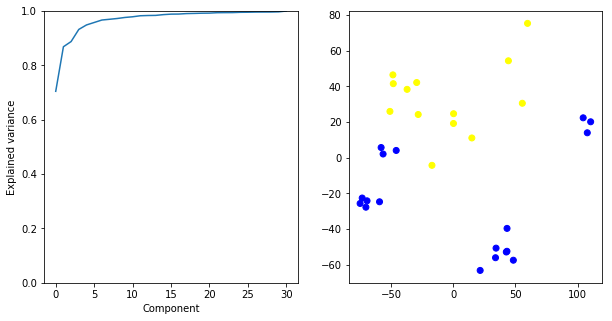

In [213]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

f = np.vectorize(lambda x: 1 - x)
axes[0].plot(f(test_pca.explained_variance_ratio_))
axes[0].set_ylim(0,1)
axes[0].set_ylabel("Explained variance")
axes[0].set_xlabel("Component")

colors = lambda x: "Yellow" if x==1 else "Blue"
f = np.vectorize(colors)
axes[1].scatter(Smaller_test_Features[:,0], Smaller_test_Features[:,1], c=f(label))

plt.show()

### NOW, we actually go on to do PCA for our model, as below:

In [258]:
genes_needed = 20
my_pca = PCA(n_components = genes_needed)

smaller_Features = my_pca.fit_transform(Features)
smaller_Features.shape

(31, 20)

### NOW we carry on to make our model, with the reduced feature

In [265]:
grid = { "C": [i/10 for i in range(2, 50, 5)],
               "kernel": ["linear", "rbf", "poly"],
                "gamma":["auto"],
               "decision_function_shape" : ["ovo", "ovr"],
              }

# we create the skeleton of our model
our_svm_model = GridSearchCV(SVC(), param_grid=grid, cv=3)

# Now we put into our reduced featured data
our_svm_model.fit(smaller_Features, label)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.2, 0.7, 1.2, 1.7, 2.2, 2.7, 3.2, 3.7, 4.2, 4.7], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['auto'], 'decision_function_shape': ['ovo', 'ovr']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [266]:
# NOW we find our best svm from the range of models just created
our_BEST_svm_model = our_svm_model.best_estimator_

# we now just print out the actual parameters of this best svm
for parameter, value in our_BEST_svm_model.get_params().items():
    print(parameter, value, sep='\t')

C	0.2
cache_size	200
class_weight	None
coef0	0.0
decision_function_shape	ovo
degree	3
gamma	auto
kernel	linear
max_iter	-1
probability	False
random_state	None
shrinking	True
tol	0.001
verbose	False


In [268]:
# NOW we find accuracy on the trainng data
# THIS WILL BE 100% BCOZ, WE HAVE CONSTRUCTED THE MODEL FROM THIS DATA ITSELF, SO MODEL WILL BE TOO GOOD :D :D :D
our_BEST_svm_model.score(X=smaller_Features, y=label)

1.0

In [269]:
# FINALLY we test our model using the test_data. 
# but before we need to use PCA to apply on the model, as we have done exactly with the train_data

test_Features, test_label = Test_Data.drop(columns=["Label"]), Test_Data["Label"]

smaller_test_Features = my_pca.fit_transform(test_Features)

our_BEST_svm_model.score(X = smaller_test_Features, y = test_label)

0.61290322580645162

### NOW, we use our 2 random samples in hand to predict their labels using our model
### we first pre-process them into a dataframe to work together
#### REMEMBER: we can't use PCA in this case, as the n_samples is just 2 for which PCA will result in just 2 prin_components
#### So, wew randomly took 20 features from 22283

In [278]:
random_sample1 = pd.DataFrame(random_sample1).T
random_sample2 = pd.DataFrame(random_sample2).T
random_sample = pd.concat([random_sample1,random_sample2], axis=0)
random_sample.shape

(2, 22284)

In [295]:
pred_Features, pred_label = random_sample.drop(columns=["Label"]), random_sample["Label"]

rand_idx = random.sample(range(22283), 20)
smaller_pred_Features = pred_Features[rand_idx]
#smaller_pred_Features.shape
our_BEST_svm_model.predict(smaller_pred_Features), our_BEST_svm_model.score(smaller_pred_Features, pred_label)

(array([1, 1], dtype=int64), 0.5)

#### So we get one of them right, the other wrong.. so 50% accuracy from these samples.
## FALTU MODEL >:O

In [373]:
### This cell is for working the model WITHOUT the prediction two samples

Merged_Data = sklearn.utils.shuffle(Merged_Data).reset_index(drop=True)
#Merged_Data.shape

#Train_Data, Test_Data = Merged_Data.iloc[:32,:], Merged_Data.iloc[32:,:]
#Train_Data.shape, Test_Data.shape
Train_Data, Test_Data = sklearn.model_selection.train_test_split(Merged_Data,test_size=32, train_size=32)
Features, label = Train_Data.drop(columns=["Label"]), Train_Data["Label"]

genes_needed = 20
my_pca = PCA(n_components = genes_needed)
smaller_Features = my_pca.fit_transform(Features)
#smaller_Features.shape

grid = { "C": [i/10 for i in range(1, 50)],
               "kernel": ["linear", "rbf", "poly"],
                "gamma":["auto"],
               "decision_function_shape" : ["ovo", "ovr"],
              }

# we create the skeleton of our model
our_svm_model = GridSearchCV(SVC(gamma='scale'), param_grid=grid, cv=3)

# Now we put into our reduced featured data
our_svm_model.fit(smaller_Features, label)
our_BEST_svm_model = our_svm_model.best_estimator_
for parameter, value in our_BEST_svm_model.get_params().items():
    print(parameter, value, sep='\t')
#our_BEST_svm_model.score(X=smaller_Features, y=label)
test_Features, test_label = Test_Data.drop(columns=["Label"]), Test_Data["Label"]
smaller_test_Features = my_pca.fit_transform(test_Features)
our_BEST_svm_model.score(X = smaller_test_Features, y = test_label)

C	0.1
cache_size	200
class_weight	None
coef0	0.0
decision_function_shape	ovo
degree	3
gamma	auto
kernel	linear
max_iter	-1
probability	False
random_state	None
shrinking	True
tol	0.001
verbose	False


0.84375

### Far better accuracy is achieved just for the addition of 2 more samples :/

### Now, we test using KNearest Neighbors classifiers

In [401]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(smaller_Features, label)

knn.score(smaller_Features, label), knn.score(smaller_test_Features, test_label)

(0.90625, 0.78125)

In [403]:
knn.fit(Features, label)

knn.score(Features, label), knn.score(test_Features, test_label)

(0.90625, 0.96875)

### Here, we see not 100% accuracy even for the train data, with which we have built the model
### But, we see that if we put all the features instead of jst the reduced ones, accuracy increases

### Now, we plot a graph with different number of neighbors, and see their accuracies...in each case we used all features

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
for neighbors = 2, accuracy is 0.937500 
for neighbors = 3, accuracy is 0.968750 
for neighbors = 4, accuracy is 0.937500 
for neighbors = 5, accuracy is 0.968750 
for neighbors = 6, accuracy is 0.781250 
for neighbors = 7, accuracy is 0.843750 
for neighbors = 8, accuracy is 0.812500 
for neighbors = 9, accuracy is 0.875000 
for neighbors = 10, accuracy is 0.843750 
for neighbors = 11, accuracy is 0.843750 
for neighbors = 12, accuracy is 0.781250 
for neighbors = 13, accuracy is 0.750000 
for neighbors = 14, accuracy is 0.750000 
for neighbors = 15, accuracy is 0.781250 
for neighbors = 16, accuracy is 0.812500 
for neighbors = 17, accuracy is 0.687500 
for neighbors = 18, accuracy is 0.750000 
for neighbors = 19, accuracy is 0.718750 
for neighbors = 20, accuracy is 0.812500 


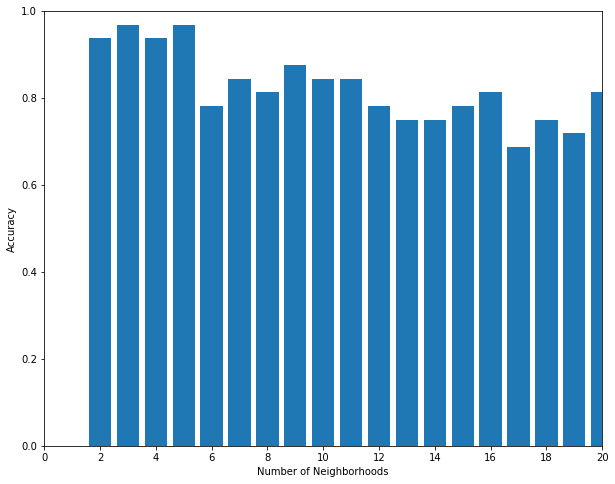

In [399]:
k_range = [i for i in range(2,21)]
print(k_range)

accuracy = []
for i in k_range:
    new_knn = KNeighborsClassifier(n_neighbors=i)
    new_knn.fit(Features, label)
    accuracy_curr_knn = new_knn.score(test_Features, test_label)
    print ("for neighbors = %d, accuracy is %f "%(i,accuracy_curr_knn))
    accuracy.append(accuracy_curr_knn)
    
plt.figure(figsize=(10, 8))
plt.bar(k_range, accuracy)
plt.ylim(0,1)
plt.xlim(0,20)
#plt.locator_params(axis='y', nbins=20)
plt.locator_params(axis = 'x', nbins = 10)
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighborhoods")
plt.show()

### Thus we see for a less number of neighbors, accuracy is better. Overall accuracy is better than SVM

### NOW we test against Liinear Regression Analysis:

In [405]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(smaller_Features, label)

lr.score(smaller_Features, label), lr.score(smaller_test_Features, test_label)

(0.99945544933004582, 0.14467536142799109)

In [408]:
## NOW USING ALL THE FEATURES INSTEAD OF JUST THE OUTPUT OF PCA:
lr.fit(Features, label)

lr.score(Features, label), lr.score(test_Features, test_label), lr.score(pred_Features, pred_label)

(1.0, 0.9160411462610748, 0.92725708734967438)

#### Similar to knn, much more accuracy for larger number of features.

### Using Stochastic Gradient Descent Classifier:

In [418]:
from sklearn.linear_model import SGDClassifier


sgd = SGDClassifier(loss='perceptron', n_iter=10)

sgd.fit(Features, label)

sgd.score(Features, label), sgd.score(test_Features, test_label)

(1.0, 1.0)

### NOW we test the SCDClassifier using differnt loss functions and n_iterations and plot

loss_func: hinge, n_iter: 1, accuracy on train: 0.968750 on test: 0.875000
loss_func: hinge, n_iter: 3, accuracy on train: 0.562500 on test: 0.625000
loss_func: hinge, n_iter: 5, accuracy on train: 1.000000 on test: 0.968750
loss_func: hinge, n_iter: 7, accuracy on train: 1.000000 on test: 0.968750
loss_func: hinge, n_iter: 9, accuracy on train: 0.437500 on test: 0.375000
loss_func: hinge, n_iter: 11, accuracy on train: 0.968750 on test: 0.812500
loss_func: hinge, n_iter: 13, accuracy on train: 1.000000 on test: 0.968750
loss_func: hinge, n_iter: 15, accuracy on train: 1.000000 on test: 0.968750


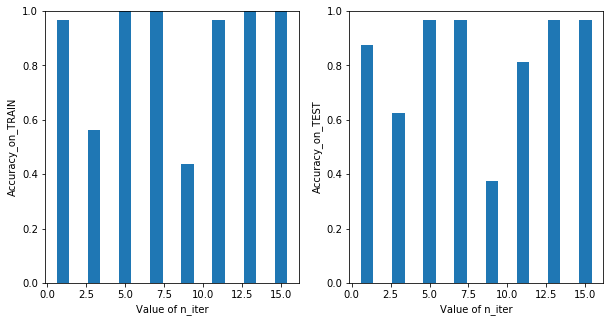

loss_func: squared_hinge, n_iter: 1, accuracy on train: 0.656250 on test: 0.718750
loss_func: squared_hinge, n_iter: 3, accuracy on train: 0.437500 on test: 0.375000
loss_func: squared_hinge, n_iter: 5, accuracy on train: 0.812500 on test: 0.781250
loss_func: squared_hinge, n_iter: 7, accuracy on train: 0.625000 on test: 0.656250
loss_func: squared_hinge, n_iter: 9, accuracy on train: 1.000000 on test: 0.968750
loss_func: squared_hinge, n_iter: 11, accuracy on train: 0.875000 on test: 0.875000
loss_func: squared_hinge, n_iter: 13, accuracy on train: 1.000000 on test: 0.937500
loss_func: squared_hinge, n_iter: 15, accuracy on train: 1.000000 on test: 0.937500


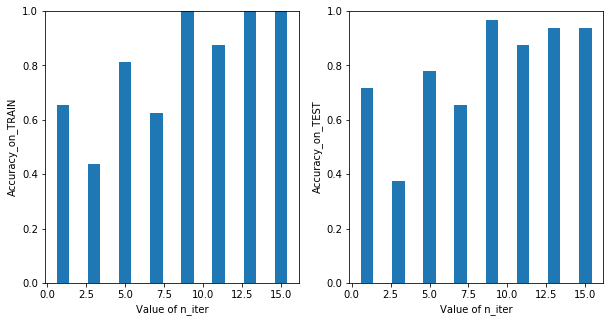

loss_func: log, n_iter: 1, accuracy on train: 0.562500 on test: 0.625000
loss_func: log, n_iter: 3, accuracy on train: 0.562500 on test: 0.625000
loss_func: log, n_iter: 5, accuracy on train: 0.437500 on test: 0.375000
loss_func: log, n_iter: 7, accuracy on train: 0.437500 on test: 0.375000
loss_func: log, n_iter: 9, accuracy on train: 0.562500 on test: 0.625000
loss_func: log, n_iter: 11, accuracy on train: 0.562500 on test: 0.625000
loss_func: log, n_iter: 13, accuracy on train: 1.000000 on test: 0.937500
loss_func: log, n_iter: 15, accuracy on train: 1.000000 on test: 0.906250


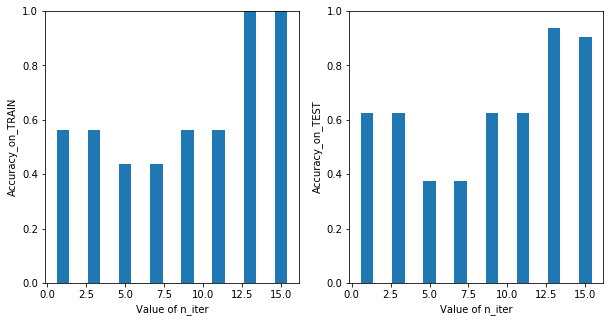

In [438]:
loss_func = ['hinge', 'squared_hinge', 'log']
n_iter_value = [i for i in range(1,16,2)]

for i in loss_func:
    acc_on_train = []
    acc_on_test = []
    for j in n_iter_value:
        sgd = SGDClassifier(loss=i, n_iter=j)
        sgd.fit(Features, label)
        on_train = sgd.score(Features, label)
        acc_on_train.append(on_train)
        on_test = sgd.score(test_Features, test_label)
        acc_on_test.append(on_test)
        print ("loss_func: %s, n_iter: %d, accuracy on train: %f on test: %f"%(i,j,on_train,on_test))
    fig, axes = plt.subplots(1,2, figsize=(10,5))
    axes[0].bar(n_iter_value, acc_on_train)
    axes[0].set_ylim(0,1)
    axes[0].set_ylabel("Accuracy_on_TRAIN")
    axes[0].set_xlabel("Value of n_iter")
    axes[1].bar(n_iter_value, acc_on_test)
    axes[1].set_ylim(0,1)
    axes[1].set_ylabel("Accuracy_on_TEST")
    axes[1].set_xlabel("Value of n_iter")
    plt.show()
    